# Afinación de los parámetros de modelos

* *30 min* | Ultima modificación: Abril 13, 2020

Este tutorial demuestra como obtener la mejor combinación de hiperparámetros posibles de un modelo usando cross-validation.

## Carga de datos

In [1]:
#
# Carga de datos del dataset del iris
#
from sklearn import datasets
data = datasets.load_iris()

#
# Carga de datos.
#   Se verifica la cantidad de datos de la muestra
#
X, y = data.data, data.target
print(X.shape, y.shape)

(150, 4) (150,)


## Partición de los datos

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

## Preprocesamiento

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Creación de la malla de datos

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


#
# La variable tuned_parameters es una lista de diccionarios
# que contiene los valores que pueden ajustarse
#
parameters = [ {'penalty': ['none']},
               {'penalty': ['l2'],
                'alpha': [0.00001, 0.00002, 0.00003]},
               {'penalty': ['l1'],
                'alpha': [0.00001, 0.00002, 0.00003],
                'l1_ratio': [0.10, 0.15, 0.20]} ]

#
# Construye la malla de hiperparámetros
#
clf = GridSearchCV(SGDClassifier(), 
                       parameters, 
                       cv=5)

#
# Entrenamiento de todos los modelos y selección
# de la combinación óptima de parámetros
#
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['none']},
                         {'alpha': [1e-05, 2e-05, 3e-05], 'penalty': ['l2']},
                         {'alpha': [1e-05, 2e-05, 3e-05],
                         

In [5]:
#
# Combinaciones usadas de hiperparámetros
#
clf.cv_results_

{'mean_fit_time': array([0.0029778 , 0.0026813 , 0.0027029 , 0.00276084, 0.00284386,
        0.00289602, 0.00354352, 0.00304675, 0.00286613, 0.00259495,
        0.00260658, 0.00264225, 0.00261641]),
 'std_fit_time': array([2.64037071e-04, 1.03741554e-04, 1.62831155e-04, 1.24644029e-04,
        1.42623341e-04, 1.55474465e-04, 7.35495721e-04, 4.33973398e-04,
        2.39768052e-04, 5.78474424e-05, 9.58884313e-05, 5.83857066e-05,
        4.43637976e-05]),
 'mean_score_time': array([0.0004066 , 0.00045028, 0.00037251, 0.00045509, 0.00034795,
        0.00033865, 0.00057549, 0.00040164, 0.00032053, 0.00035806,
        0.00035367, 0.00033679, 0.00035515]),
 'std_score_time': array([5.51605175e-05, 1.39943103e-04, 7.19840298e-05, 7.49248204e-05,
        3.83697205e-05, 1.94638363e-05, 2.31998865e-04, 6.61346838e-05,
        1.01316395e-05, 6.18802367e-05, 5.34752411e-05, 4.11255394e-05,
        5.27823627e-05]),
 'param_penalty': masked_array(data=['none', 'l2', 'l2', 'l2', 'l1', 'l1', 'l1', '

In [6]:
#
# Mejor modelo
#
clf.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
#
# Coeficientes del mejor modelo
#
clf.best_estimator_.coef_

array([[-17.11345065,  13.34621913, -19.44408516, -19.37956468],
       [ -3.57221559,  -3.50681797,  14.01690648,  -8.24023211],
       [ -2.3230746 , -11.98231611,  39.19242903,  42.88226925]])

In [8]:
#
# Interceptos del mejor modelo
#
clf.best_estimator_.intercept_

array([-10.11758215,  -0.85261756, -58.61404576])

## Evaluación del mejor modelo encontrado

In [9]:
from sklearn import metrics

#
# Pronóstico para el conjunto de entrenamiento
#
y_train_pred = clf.predict(X_train)

# Precisión para el conjunto de entrenamiento
metrics.accuracy_score(y_train, y_train_pred)

0.9642857142857143

In [10]:
# Precisión para el conjunto de prueba
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

In [11]:
# 
# Métricas de evaluación
#
print(metrics.classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [12]:
#
# Matriz de confusión
#
metrics.confusion_matrix(y_test, y_pred)

#
# Note que en el ejemplo del tutorial anterior.
#
# array([[ 8,  0,  0],
#        [ 5,  1,  5],
#        [ 0,  0, 19]])
#

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 18]])

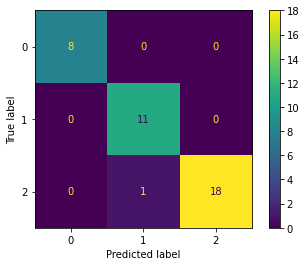

In [13]:
from sklearn.metrics import plot_confusion_matrix

#
# Note que la función computa internamente
# el pronósitco del clasificador
#
plot_confusion_matrix(
    clf,        # clasificador entrenado
    X_test,     # matriz de variables de entrada
    y_test);    # valor real 